In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [31]:
df_car = pd.read_csv('car.csv')
df_car.head()

,,Ngày đăng bài,Tên,Giá,Năm SX,Nhiên liệu,Kiểu dáng,Tình trạng,Km đã đi,Hộp số,Xuất xứ,Tỉnh thành
0,0,12/09/2025,Lexus RX 350 Luxury 2024,4 tỉ 290 triệu,2024,Máy xăng,SUV,Xe cũ,3.900 km,Số tự động,Nhập khẩu,Gò Vấp - Tp.HCM
1,1,05/10/2025,Hyundai Tucson 2.0 Tiêu chuẩn 2019,590 triệu,2019,Máy xăng,SUV,Xe cũ,59.000 km,Số tự động,Trong nước,Lâm Đồng
2,2,29/09/2025,Honda HR-V L 2019,535 triệu,2019,Máy xăng,SUV,Xe cũ,01 km,Số tự động,Nhập khẩu,Nha Trang - Khánh Hòa
3,3,01/10/2025,Mitsubishi Xpander 1.5 MT 2020,443 triệu,2020,Máy xăng,MPV,Xe cũ,10.000 km,Số sàn,Nhập khẩu,Hà Nội
4,4,27/09/2025,Suzuki XL7 GLX 2022,450 triệu,2022,Máy xăng,SUV,Xe cũ,52.000 km,Số tự động,Nhập khẩu,Đồng Nai


In [32]:
df_car['Kiểu dáng'].isna().sum()

np.int64(93)

In [33]:
df_car['Kiểu dáng'].fillna('Missing', inplace=True)

/tmp/ipython-input-2490504001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car['Kiểu dáng'].fillna('Missing', inplace=True)


In [34]:
df_car['Kiểu dáng'].value_counts()

,count
Kiểu dáng,
SUV,712
Sedan,644
Hatchback,250
MPV,161
Missing,93
Crossover,86
Bán tải,77
Van/Minivan,29
Convertible,15


In [35]:
series = [pd.to_numeric(df_car['Km đã đi'][i].split()[0]) if not pd.isna(df_car['Km đã đi'][i]) else np.nan for i in range(len(df_car['Km đã đi']))]

In [36]:
series = [series[i] if isinstance(series[i],float) else np.nan for i in range(len(series))]

In [37]:
series = pd.DataFrame(series)
series = series.fillna(series.mean())
series = np.array(series)

In [38]:
series = np.array(series, dtype=float) * 1000
series = series.astype(int)
df_car['Km đã đi'] = series
df_car['Km đã đi']

,Km đã đi
0,3900
1,59000
2,69666
3,10000
4,52000
...,...
2080,64000
2081,78000
2082,40000
2083,18612


In [39]:
df_car['Hộp số'].isna().sum()

np.int64(1)

In [40]:
df_car['Hộp số'].value_counts()

,count
Hộp số,
Số tự động,1827
Số sàn,256
Số hỗn hợp,1


In [41]:
df_car['Hộp số'] = df_car['Hộp số'].fillna('Số tự động')
df_car['Hộp số'].isna().sum()

np.int64(0)

In [42]:
df_car['Xuất xứ'].isna().sum()

np.int64(15)

In [43]:
df_car['Xuất xứ'].value_counts()

,count
Xuất xứ,
Trong nước,1186
Nhập khẩu,884


In [44]:
df_car['Xuất xứ'] = df_car['Xuất xứ'].fillna('Trong nước')
df_car['Xuất xứ'].isna().sum()

np.int64(0)

In [45]:
def convert_to_trieu_dong(price):
  price = price.split()
  if len(price) == 2:
    return float(price[0])
  else:
    return float(price[0]) * 1000 + float(price[2])

In [46]:
convert_price = [int(convert_to_trieu_dong(df_car['Giá'][i])) for i in range(len(df_car['Giá']))]
df_car['Giá'] = convert_price
df_car['Giá']

,Giá
0,4290
1,590
2,535
3,443
4,450
...,...
2080,310
2081,425
2082,2850
2083,500


In [47]:
for col in ['Giá', 'Km đã đi']:
    Q1 = df_car[col].quantile(0.25)
    Q3 = df_car[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(f'{col}: giữ lại trong [{lower:.2f}, {upper:.2f}]')
    df_car = df_car[(df_car[col] >= lower) & (df_car[col] <= upper)]

Giá: giữ lại trong [-435.00, 1645.00]
Km đã đi: giữ lại trong [-39500.00, 172500.00]


In [25]:
df_car['Tên'] = df_car['Tên'].apply(lambda x: x.split()[0])
df_car['Tỉnh thành'] = df_car['Tỉnh thành'].apply(lambda x: x.split('-')[len(x.split('-'))-1])

In [26]:
df_car

,,Ngày đăng bài,Tên,Giá,Năm SX,Nhiên liệu,Kiểu dáng,Tình trạng,Km đã đi,Hộp số,Xuất xứ,Tỉnh thành
1,1,05/10/2025,Hyundai,590,2019,Máy xăng,SUV,Xe cũ,59000000000,Số tự động,Trong nước,Lâm Đồng
2,2,29/09/2025,Honda,535,2019,Máy xăng,SUV,Xe cũ,69000000000,Số tự động,Nhập khẩu,Khánh Hòa
3,3,01/10/2025,Mitsubishi,443,2020,Máy xăng,MPV,Xe cũ,10000000000,Số sàn,Nhập khẩu,Hà Nội
4,4,27/09/2025,Suzuki,450,2022,Máy xăng,SUV,Xe cũ,52000000000,Số tự động,Nhập khẩu,Đồng Nai
5,5,27/09/2025,Hyundai,215,2010,Máy xăng,Hatchback,Xe cũ,85000000000,Số tự động,Nhập khẩu,Tp.HCM
...,...,...,...,...,...,...,...,...,...,...,...,...
2079,2079,08/09/2025,Ford,350,2018,Máy xăng,SUV,Xe cũ,120000000000,Số tự động,Nhập khẩu,Đà Nẵng
2080,2080,08/09/2025,Mercedes-Benz,310,2013,Máy xăng,Sedan,Xe cũ,64000000000,Số tự động,Nhập khẩu,Tp.HCM
2081,2081,06/10/2025,Toyota,425,2015,Máy xăng,Sedan,Xe cũ,78000000000,Số tự động,Trong nước,Đà Nẵng
2083,2083,28/09/2025,Mazda,500,2023,Máy xăng,Crossover,Xe cũ,18000000000,Số tự động,Nhập khẩu,Quảng Nam


In [ ]:
df_car.to_csv('car_clean.csv', index=False)

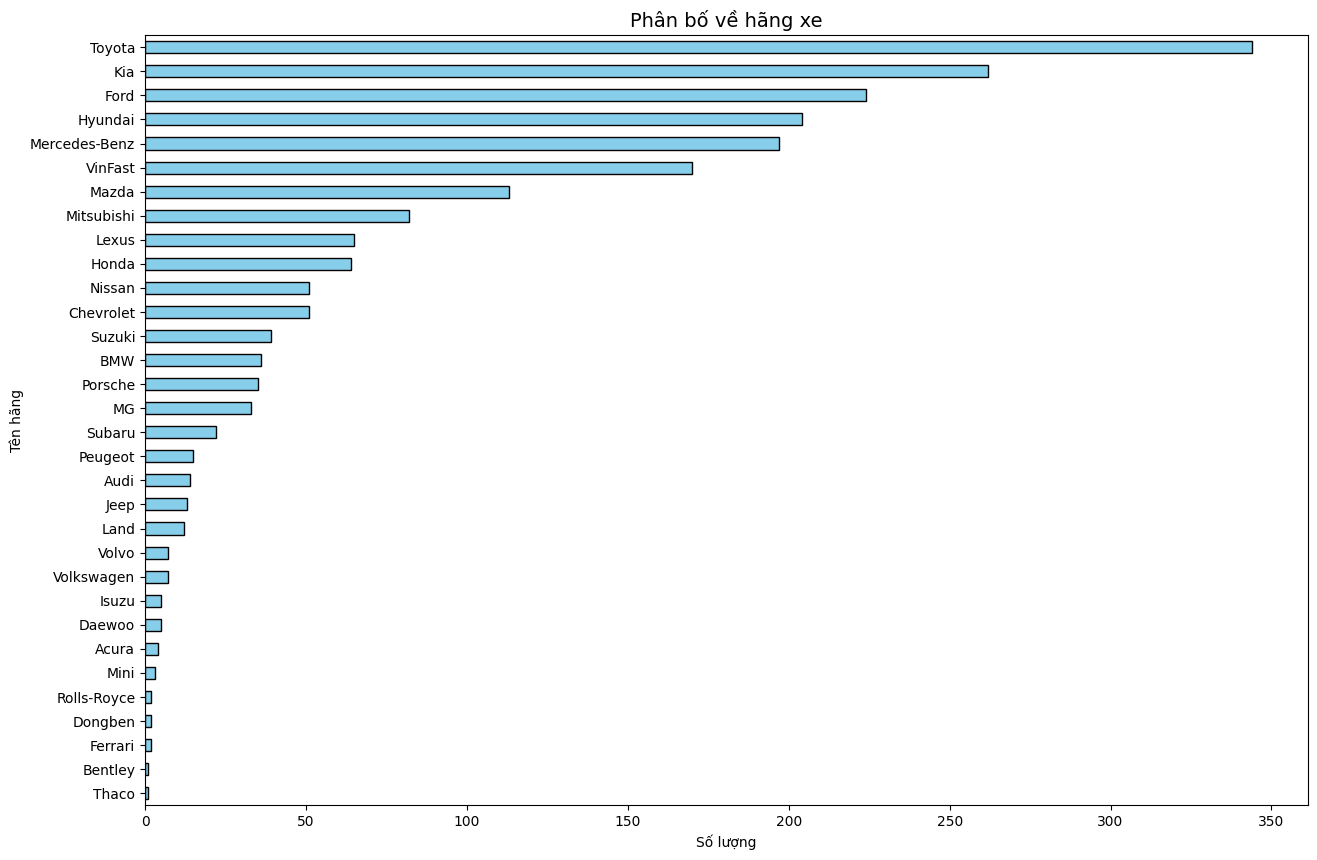

In [ ]:
plt.figure(figsize=(15,10))
df_car['Tên'].value_counts().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Phân bố về hãng xe", fontsize=14)
plt.xlabel("Số lượng")
plt.ylabel("Tên hãng")
plt.gca().invert_yaxis()  # Cho hãng nhiều nhất lên trên
plt.savefig('pb_hang.png')
plt.show()

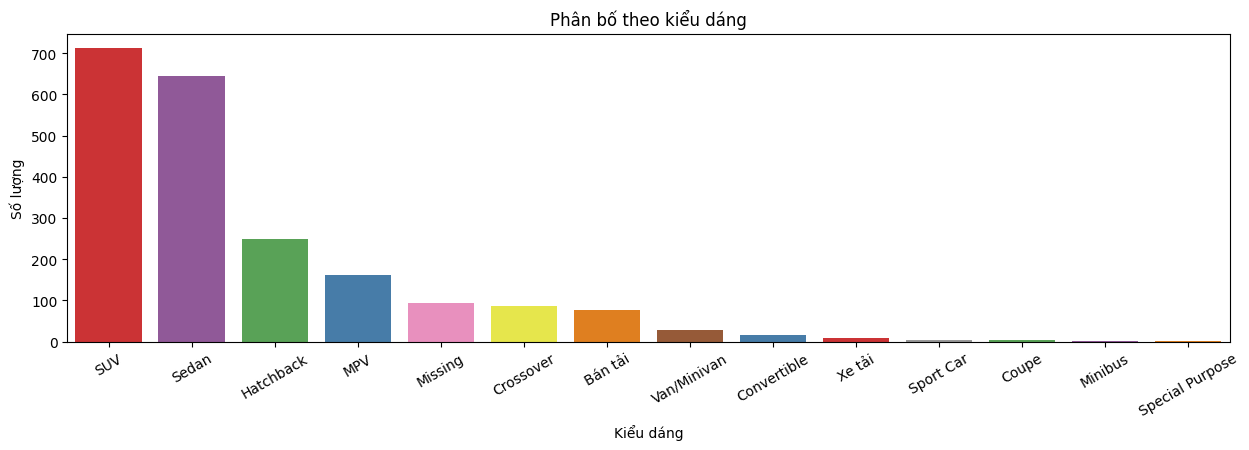

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_car,x = 'Kiểu dáng', order=df_car['Kiểu dáng'].value_counts().index,palette='Set1',hue="Kiểu dáng")
plt.title("Phân bố theo kiểu dáng")
plt.xlabel("Kiểu dáng")
plt.ylabel("Số lượng")
plt.xticks(rotation=30)
plt.savefig('pb_kieudang.png')
plt.show()


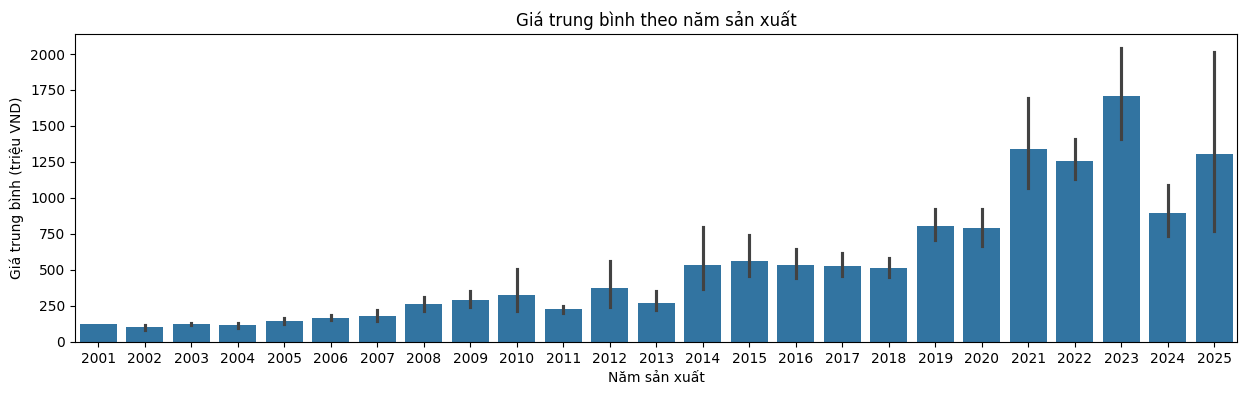

In [ ]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_car, x='Năm SX', y='Giá')
plt.title("Giá trung bình theo năm sản xuất")
plt.xlabel("Năm sản xuất")
plt.ylabel("Giá trung bình (triệu VND)")
plt.savefig('gia_nam.png')
plt.show()


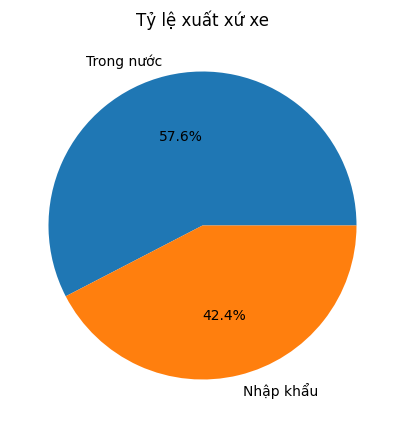

In [ ]:
df_car['Xuất xứ'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.title("Tỷ lệ xuất xứ xe")
plt.ylabel("")
plt.savefig('pb_xuatsu.png')
plt.show()

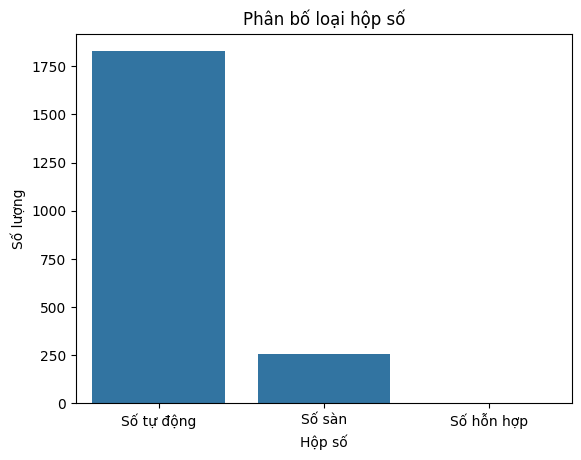

In [ ]:
sns.countplot(data=df_car, x='Hộp số')
plt.title("Phân bố loại hộp số")
plt.xlabel("Hộp số")
plt.ylabel("Số lượng")
plt.savefig('pb_hopso.png')
plt.show()